Air data quality analysis

In [37]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
#import csv files with air quality data
df = pd.read_csv('C://Users/jonas/Downloads/Luftqualitaet_DEHH008_Hamburg-Sternschanze_2016-01-01_00-2019-01-01_00 (1).csv', sep = ';', engine = 'python', encoding = 'utf-8')
df_2019 = pd.read_csv('C://Users/jonas/Downloads/Luftqualitaet_DEHH008_Hamburg-Sternschanze_2019-01-01_00-2022-01-01_00.csv', sep = ';', engine = 'python', encoding = 'utf-8')
df_2022 = pd.read_csv('C://Users/jonas/Downloads/Luftqualitaet_DEHH008_Hamburg-Sternschanze_2022-01-01_00-2023-07-13_23.csv', sep = ';', engine = 'python', encoding = 'utf-8')


In [39]:
#concat the 3 data frames from the 3 csv files to one data frame
df = pd.concat([df, df_2019, df_2022])

In [40]:
#print data frame to review data
df

,Stationscode,Datum,Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³,Ozon (O?) Ein-Stunden-Mittelwert in µg/m³,Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³,"Feinstaub (PM?,?) Tagesmittel (stündlich gleitend) in µg/m³",Luftqualitätsindex
0,DEHH008,'01.01.2016 01:00',57,4,49,-,schlecht
1,DEHH008,'01.01.2016 02:00',68,3,48,-,schlecht
2,DEHH008,'01.01.2016 03:00',75,3,40,-,schlecht
3,DEHH008,'01.01.2016 04:00',78,3,34,-,schlecht
4,DEHH008,'01.01.2016 05:00',80,3,33,-,schlecht
...,...,...,...,...,...,...,...
13413,DEHH008,'13.07.2023 23:00',9,59,15,5,sehr gut
13414,DEHH008,'13.07.2023 24:00',10,51,16,5,sehr gut
13415,DEHH008,'14.07.2023 01:00',10,48,14,6,sehr gut
13416,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#drop columns that are not needed
df.drop(columns=['Feinstaub (PM?,?) Tagesmittel (stündlich gleitend) in µg/m³', 'Stationscode'],inplace=True)
df.dropna(axis=0,inplace=True)

In [42]:
#print data frame to check whether the dropping has worked
df

,Datum,Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³,Ozon (O?) Ein-Stunden-Mittelwert in µg/m³,Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³,Luftqualitätsindex
0,'01.01.2016 01:00',57,4,49,schlecht
1,'01.01.2016 02:00',68,3,48,schlecht
2,'01.01.2016 03:00',75,3,40,schlecht
3,'01.01.2016 04:00',78,3,34,schlecht
4,'01.01.2016 05:00',80,3,33,schlecht
...,...,...,...,...,...
13411,'13.07.2023 21:00',9,66,13,gut
13412,'13.07.2023 22:00',9,65,10,gut
13413,'13.07.2023 23:00',9,59,15,sehr gut
13414,'13.07.2023 24:00',10,51,16,sehr gut


In [43]:
#extract the date and the time as two different columns
df[['Tag','Zeit']] = df["Datum"].apply(lambda x: pd.Series(str(x).split(" ")))

In [44]:
#check the data types 
df.dtypes

Datum                                                         object
Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³    object
Ozon (O?) Ein-Stunden-Mittelwert in µg/m³                     object
Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³        object
Luftqualitätsindex                                            object
Tag                                                           object
Zeit                                                          object
dtype: object

In [45]:
#drop column Datum as we have now to separate colums for Tag and Zeit
df.drop(columns='Datum',inplace=True)

In [46]:
#print data frame to review data
df


,Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³,Ozon (O?) Ein-Stunden-Mittelwert in µg/m³,Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³,Luftqualitätsindex,Tag,Zeit
0,57,4,49,schlecht,'01.01.2016,01:00'
1,68,3,48,schlecht,'01.01.2016,02:00'
2,75,3,40,schlecht,'01.01.2016,03:00'
3,78,3,34,schlecht,'01.01.2016,04:00'
4,80,3,33,schlecht,'01.01.2016,05:00'
...,...,...,...,...,...,...
13411,9,66,13,gut,'13.07.2023,21:00'
13412,9,65,10,gut,'13.07.2023,22:00'
13413,9,59,15,sehr gut,'13.07.2023,23:00'
13414,10,51,16,sehr gut,'13.07.2023,24:00'


In [47]:
#sort the data frame in new order
df=df[['Tag','Zeit','Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³','Ozon (O?) Ein-Stunden-Mittelwert in µg/m³','Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³','Luftqualitätsindex']]

In [48]:
#print data frame to review data 
df

,Tag,Zeit,Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³,Ozon (O?) Ein-Stunden-Mittelwert in µg/m³,Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³,Luftqualitätsindex
0,'01.01.2016,01:00',57,4,49,schlecht
1,'01.01.2016,02:00',68,3,48,schlecht
2,'01.01.2016,03:00',75,3,40,schlecht
3,'01.01.2016,04:00',78,3,34,schlecht
4,'01.01.2016,05:00',80,3,33,schlecht
...,...,...,...,...,...,...
13411,'13.07.2023,21:00',9,66,13,gut
13412,'13.07.2023,22:00',9,65,10,gut
13413,'13.07.2023,23:00',9,59,15,sehr gut
13414,'13.07.2023,24:00',10,51,16,sehr gut


In [49]:
#check data types to check the type of the colums Tag and Zeit
df.dtypes

Tag                                                           object
Zeit                                                          object
Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³    object
Ozon (O?) Ein-Stunden-Mittelwert in µg/m³                     object
Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³        object
Luftqualitätsindex                                            object
dtype: object

In [51]:
#delete the ' in the columns of Tag and Zeit
df['Tag'] = df['Tag'].str.replace(r'[\']','')
df['Zeit'] = df['Zeit'].str.replace(r'[\']','')

C:\Users\jonas\AppData\Local\Temp\ipykernel_852\3179984581.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tag'] = df['Tag'].str.replace(r'[\']','')
C:\Users\jonas\AppData\Local\Temp\ipykernel_852\3179984581.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Zeit'] = df['Zeit'].str.replace(r'[\']','')


In [52]:
#print data frame to review data
df

,Tag,Zeit,Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³,Ozon (O?) Ein-Stunden-Mittelwert in µg/m³,Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³,Luftqualitätsindex
0,01.01.2016,01:00,57,4,49,schlecht
1,01.01.2016,02:00,68,3,48,schlecht
2,01.01.2016,03:00,75,3,40,schlecht
3,01.01.2016,04:00,78,3,34,schlecht
4,01.01.2016,05:00,80,3,33,schlecht
...,...,...,...,...,...,...
13411,13.07.2023,21:00,9,66,13,gut
13412,13.07.2023,22:00,9,65,10,gut
13413,13.07.2023,23:00,9,59,15,sehr gut
13414,13.07.2023,24:00,10,51,16,sehr gut


In [53]:
#drop rows that have no value in Feinstaub, Ozon or Stickstoffdioxid
df.drop(df[df['Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³'] == '-'].index, inplace = True)
df.drop(df[df['Ozon (O?) Ein-Stunden-Mittelwert in µg/m³'] == '-'].index, inplace = True)
df.drop(df[df['Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³'] == '-'].index, inplace = True)

In [54]:
#print data frame to review data
df

,Tag,Zeit,Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³,Ozon (O?) Ein-Stunden-Mittelwert in µg/m³,Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³,Luftqualitätsindex
0,01.01.2016,01:00,57,4,49,schlecht
1,01.01.2016,02:00,68,3,48,schlecht
2,01.01.2016,03:00,75,3,40,schlecht
3,01.01.2016,04:00,78,3,34,schlecht
4,01.01.2016,05:00,80,3,33,schlecht
...,...,...,...,...,...,...
13411,13.07.2023,21:00,9,66,13,gut
13412,13.07.2023,22:00,9,65,10,gut
13413,13.07.2023,23:00,9,59,15,sehr gut
13414,13.07.2023,24:00,10,51,16,sehr gut


In [55]:
#convert data of Feinstaub, Ozon and Stickstoffdioxid from objects to integer
df[['Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³', 'Ozon (O?) Ein-Stunden-Mittelwert in µg/m³','Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³']] = df[['Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³', 'Ozon (O?) Ein-Stunden-Mittelwert in µg/m³','Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³']].apply(pd.to_numeric)

In [56]:
#check data types to review whether conversion from object to integer has worked
df.dtypes

Tag                                                           object
Zeit                                                          object
Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³     int64
Ozon (O?) Ein-Stunden-Mittelwert in µg/m³                      int64
Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³         int64
Luftqualitätsindex                                            object
dtype: object

In [57]:
#define the marathon dates as list
marathon_dates = ['17.04.2016', '23.04.2017', '29.04.2018', '28.04.2019', '12.09.2021', '24.04.2022', '23.04.2023']
print(marathon_dates)

['17.04.2016', '23.04.2017', '29.04.2018', '28.04.2019', '12.09.2021', '24.04.2022', '23.04.2023']


In [58]:
#create new data frame that only consists data of the dates of the marathon from the list marathon_dates
df_marathon = df[df['Tag'].isin(marathon_dates)]

In [59]:
#print new dataframe df_marathon to review data
df_marathon

,Tag,Zeit,Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³,Ozon (O?) Ein-Stunden-Mittelwert in µg/m³,Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³,Luftqualitätsindex
2567,17.04.2016,01:00,9,65,22,gut
2568,17.04.2016,02:00,9,51,32,gut
2569,17.04.2016,03:00,8,61,18,gut
2570,17.04.2016,04:00,8,66,12,gut
2571,17.04.2016,05:00,7,59,14,sehr gut
...,...,...,...,...,...,...
11466,23.04.2023,20:00,14,50,37,gut
11467,23.04.2023,21:00,14,43,36,gut
11468,23.04.2023,22:00,14,47,32,gut
11469,23.04.2023,23:00,13,55,23,gut


In [60]:
#rename the columns in the data frame to easier and leaner naming
df_marathon.rename(columns={"Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³": "Feinstaub"},inplace=True)
df_marathon.rename(columns={"Ozon (O?) Ein-Stunden-Mittelwert in µg/m³": "Ozon"},inplace=True)
df_marathon.rename(columns={"Stickstoffdioxid (NO?) Ein-Stunden-Mittelwert in µg/m³": "Stickstoff"},inplace=True)

C:\Users\jonas\AppData\Local\Temp\ipykernel_852\306990618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marathon.rename(columns={"Feinstaub (PM??) Tagesmittel (stündlich gleitend) in µg/m³": "Feinstaub"},inplace=True)
C:\Users\jonas\AppData\Local\Temp\ipykernel_852\306990618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marathon.rename(columns={"Ozon (O?) Ein-Stunden-Mittelwert in µg/m³": "Ozon"},inplace=True)
C:\Users\jonas\AppData\Local\Temp\ipykernel_852\306990618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [61]:
#print data frame to review new naming
df_marathon

,Tag,Zeit,Feinstaub,Ozon,Stickstoff,Luftqualitätsindex
2567,17.04.2016,01:00,9,65,22,gut
2568,17.04.2016,02:00,9,51,32,gut
2569,17.04.2016,03:00,8,61,18,gut
2570,17.04.2016,04:00,8,66,12,gut
2571,17.04.2016,05:00,7,59,14,sehr gut
...,...,...,...,...,...,...
11466,23.04.2023,20:00,14,50,37,gut
11467,23.04.2023,21:00,14,43,36,gut
11468,23.04.2023,22:00,14,47,32,gut
11469,23.04.2023,23:00,13,55,23,gut


In [62]:
#create new column with the year based on the data on column Tag and print the data frame
df_marathon["Tag"] = pd.to_datetime(df_marathon["Tag"])
df_marathon['Year'] = pd.DatetimeIndex(df_marathon['Tag']).year
df_marathon


C:\Users\jonas\AppData\Local\Temp\ipykernel_852\1012092590.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_marathon["Tag"] = pd.to_datetime(df_marathon["Tag"])
C:\Users\jonas\AppData\Local\Temp\ipykernel_852\1012092590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marathon["Tag"] = pd.to_datetime(df_marathon["Tag"])
C:\Users\jonas\AppData\Local\Temp\ipykernel_852\1012092590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,Tag,Zeit,Feinstaub,Ozon,Stickstoff,Luftqualitätsindex,Year
2567,2016-04-17,01:00,9,65,22,gut,2016
2568,2016-04-17,02:00,9,51,32,gut,2016
2569,2016-04-17,03:00,8,61,18,gut,2016
2570,2016-04-17,04:00,8,66,12,gut,2016
2571,2016-04-17,05:00,7,59,14,sehr gut,2016
...,...,...,...,...,...,...,...
11466,2023-04-23,20:00,14,50,37,gut,2023
11467,2023-04-23,21:00,14,43,36,gut,2023
11468,2023-04-23,22:00,14,47,32,gut,2023
11469,2023-04-23,23:00,13,55,23,gut,2023


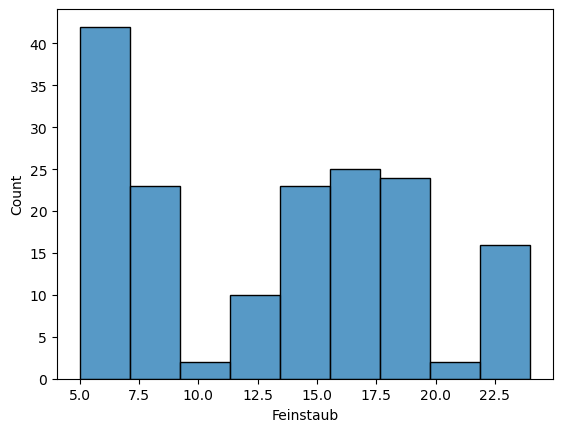

In [63]:
#create Histplot for feature Feinstaub
sns.histplot(data=df_marathon, x='Feinstaub')
plt.show()

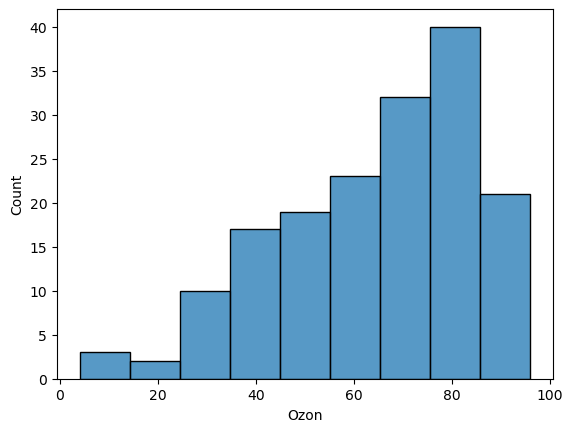

In [64]:
#create Histplot for feature Ozon
sns.histplot(data=df_marathon, x='Ozon')
plt.show()

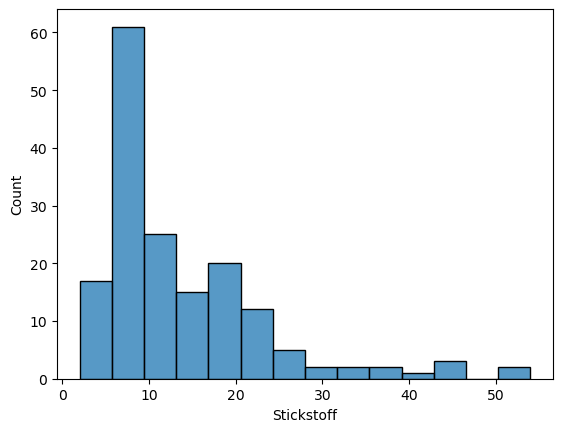

In [65]:
#create Histplot for feature Stickstoff
sns.histplot(data=df_marathon, x='Stickstoff')
plt.show()

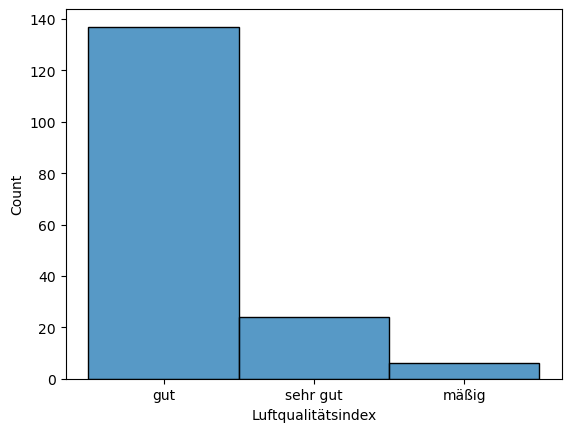

In [66]:
#create Histplot for feature Luftqualitätsindex
sns.histplot(data=df_marathon, x='Luftqualitätsindex')
plt.show()

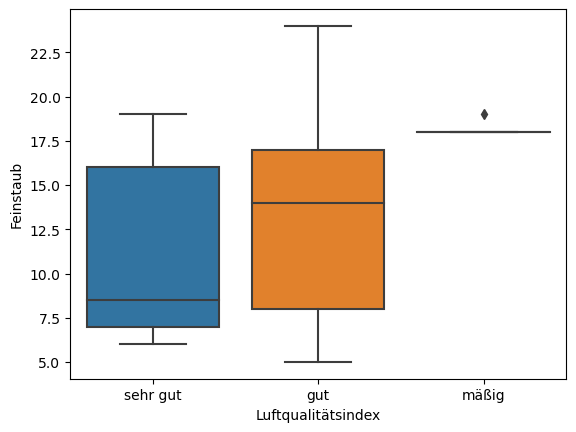

In [67]:
#create Boxplot for Luftqualitätsindex and Feinstaub
sns.boxplot(data=df_marathon, x='Luftqualitätsindex', y='Feinstaub', order= ['sehr gut', 'gut', 'mäßig'])
plt.show()

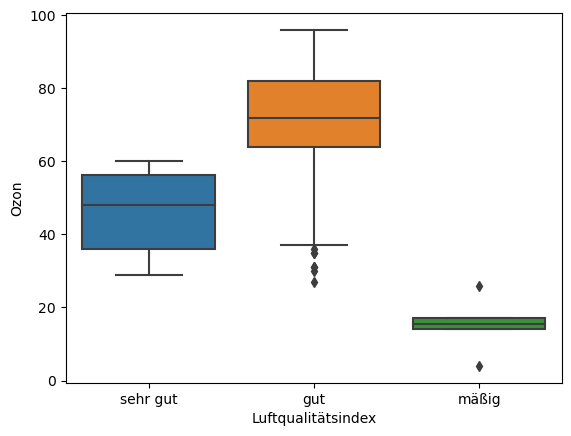

In [68]:
#create Boxplot for Luftqualitätsindex and Ozon
sns.boxplot(data=df_marathon, x='Luftqualitätsindex', y='Ozon', order= ['sehr gut', 'gut', 'mäßig'])
plt.show()

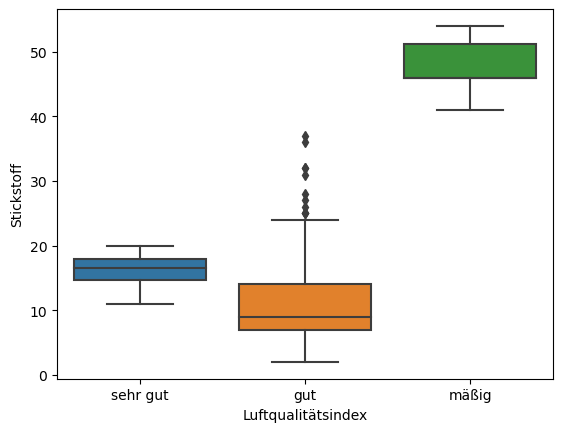

In [69]:
#create Boxplot for Luftqualitätsindex and Stickstoff
sns.boxplot(data=df_marathon, x='Luftqualitätsindex', y='Stickstoff', order= ['sehr gut', 'gut', 'mäßig'])
plt.show()

In [70]:
#export the cleaned dataframe df_marathon to csv
df_marathon.to_csv(r'C:\Users\jonas\Desktop\Julia\GitLab\marathons\raw_data\aiquality_data_cleaned.csv', index=False, encoding='utf-8')